Using TensorFlow backend.


Confusion matrix：
[[0.68 0.01 0.06 0.04 0.09 0.02 0.1 ]
 [0.15 0.74 0.02 0.02 0.04 0.02 0.01]
 [0.1  0.   0.53 0.04 0.17 0.09 0.07]
 [0.01 0.   0.01 0.92 0.01 0.01 0.03]
 [0.12 0.   0.1  0.04 0.59 0.01 0.15]
 [0.03 0.   0.07 0.04 0.01 0.82 0.03]
 [0.04 0.   0.04 0.07 0.09 0.02 0.74]]
Accuracy：0.72


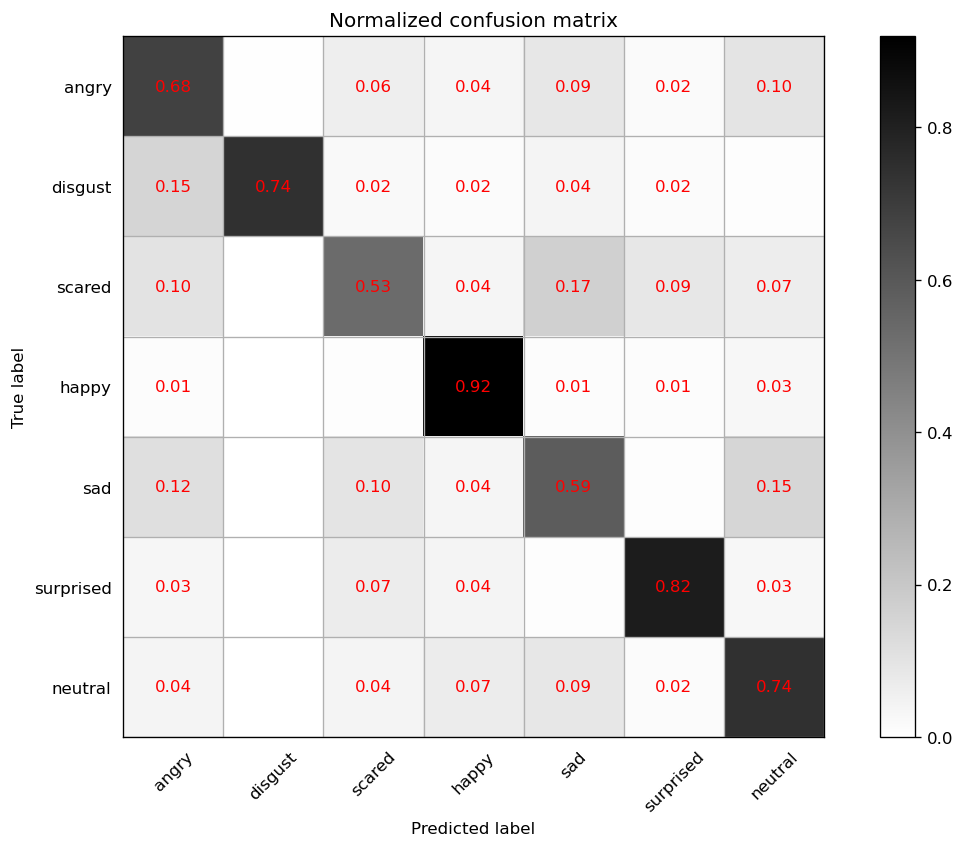

In [1]:
# %load plot_confusion_matrix.py
# -*- coding: utf-8 -*-
import warnings
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
warnings.filterwarnings(action='ignore')
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import cv2
from keras.models import load_model
from load_and_process import load_fer2013, preprocess_input
from sklearn.model_selection import train_test_split

"""
function：load the model and calculate the confusion matrix and output the result
file location：\Emotion Recognition\plot_confusion_matrix.py
attention：run plot_confusion_matrix.py, it need the librarys：
    keras 2.2.4
    pandas 0.24.2
    scikit-learn 0.21.2
    tensorflow 1.13.1
    opencv-python 4.10.25
    matplotlib 3.2.1  
"""
# @Time    : 12/07/2020
# @Author  : Yibo li
# @Email   : lslsls0001@gmail.com
# @Software: Anaconda


# emotion catalog
EMOTIONS = ["angry", "disgust", "scared", "happy", "sad", "surprised", "neutral"]
# model location
emotion_model_path = 'models/_mini_XCEPTION.102-0.66.hdf5'
emotion_model = load_model(emotion_model_path, compile=False)  # load model
input_shape = emotion_model.input_shape[1:]  # model input size

# load datasets
faces, emotions = load_fer2013()
faces = preprocess_input(faces)
num_samples, num_classes = emotions.shape

# split the training dataset and test dataset
xtrain, xtest, ytrain, ytest = train_test_split(faces, emotions, test_size=0.2, shuffle=True)

# training the training datasets
ndata = xtest.shape[0]  # training dataset size
y_pred = np.zeros((ndata,))  # save the prediction result
y_true = [ytest[i].argmax() for i in range(ndata)]  # extract the emotion label
y_true = np.array(y_true)  # matrix

# find the prediction result from test datasets.
for i in range(ndata):
    input_image = xtest[i]
    input_image = cv2.resize(input_image, input_shape[0:2], cv2.INTER_NEAREST)
    # make sure the input size is same to the model
    input_image = np.reshape(input_image, (1, input_shape[0], input_shape[1], input_shape[2]))
    # predict each face image from emotion model
    preds = emotion_model.predict(input_image)[0]
    y_pred[i] = preds.argmax()  # the one with maximum precentage is the final output

tick_marks = np.array(range(len(EMOTIONS))) + 0.5


def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.binary):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(EMOTIONS)))
    plt.xticks(xlocations, EMOTIONS, rotation=45)
    plt.yticks(xlocations, EMOTIONS)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)  # setup the precision
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # ratio
print('Confusion matrix：')
print(cm_normalized)
accuracy = np.mean([cm_normalized[i, i] for i in range(num_classes)])  # the diagonal along the confusion matrix is the final accuracy of each emotion catalog
print('Accuracy：' + str(round(accuracy, 2)))

# create window, and plot the confusion matrix
plt.figure(figsize=(12, 8), dpi=120)
ind_array = np.arange(len(EMOTIONS))
x, y = np.meshgrid(ind_array, ind_array)

# enter the value to confusion matrix
for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
    if c > 0.01:
        plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=10, va='center', ha='center')
# plot setup
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(False, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)

# show the plot
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.savefig('confusion_matrix.png', format='png')  # result saves
plt.show()  # plot shows

